# Plotting episodic return

Note the CSV file used was downloaded from W&B after completing the run.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("projected_ppo_episodic_return_alpha_100.csv", index_col=False)
df = df[["global_step", "outputs/2025-01-11/18-17-44 - charts/episodic_return"]]
df = df.rename(
    columns={
        "global_step": "Num. Interactions",
        "outputs/2025-01-11/18-17-44 - charts/episodic_return": "Episodic Return",
    }
)
df["EMA"] = df["Episodic Return"].ewm(span=100).mean()

In [3]:
print(df)

      Num. Interactions  Episodic Return       EMA
0                  2432         3.397349  3.397349
1                  2443         3.338012  3.367384
2                  2456         3.320292  3.351371
3                  2469         3.411680  3.366904
4                  2482         3.381323  3.369904
...                 ...              ...       ...
2126              30022         3.447993  3.493494
2127              30035         3.521895  3.494057
2128              30048         3.464043  3.493462
2129              30061         3.520130  3.493990
2130              30074         3.477036  3.493655

[2131 rows x 3 columns]


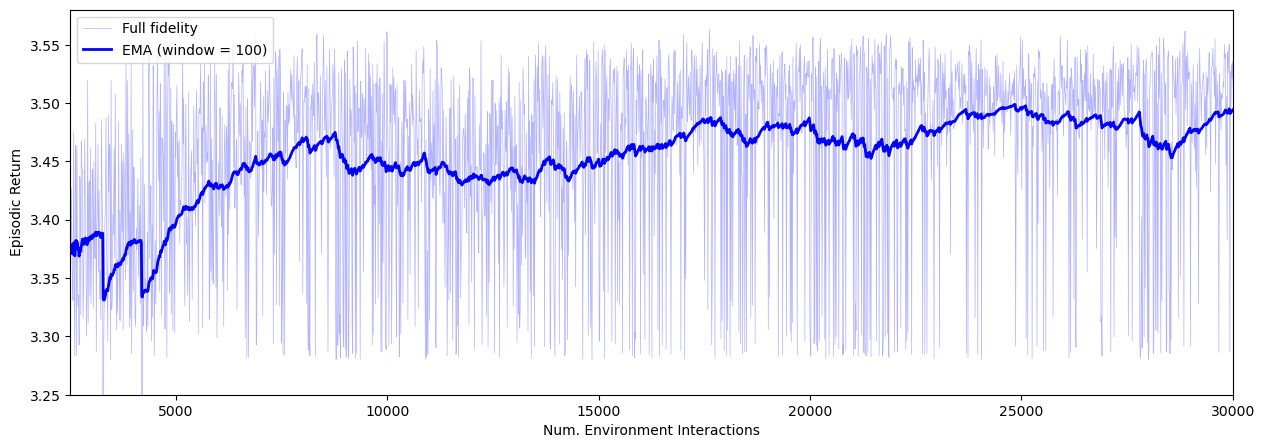

In [4]:
fig, ax = plt.subplots(figsize=(15, 5))
df.plot(
    x="Num. Interactions",
    y="Episodic Return",
    ax=ax,
    linewidth=0.5,
    color="blue",
    alpha=0.3,
    label="Full fidelity",
)
df.plot(
    x="Num. Interactions",
    y="EMA",
    ax=ax,
    linewidth=2,
    color="blue",
    label="EMA (window = 100)",
)
ax.set_xlabel("Num. Environment Interactions")
ax.set_ylabel("Episodic Return")
ax.set_xlim(2500, 30000)
ax.set_ylim(3.25, 3.58)
ax.legend(loc="upper left")
plt.savefig("projected_ppo_episodic_return_alpha_100.svg")